## 08 분류 실습 - 캐글 산탄데르 고객 만족 예측
피처 이름은 모두 익명 처리돼 이름만을 가지고 어떤 속성인지는 추정할 수 없다.

TARGET 값이 1이면 불만을 가진 고객, 0이면 만족한 고객

대부분이 만족이고 불만족인 데이터는 일부일 것이기 때문에 accuracy보다 ROC-AUC로 성능평가하는게 더 적합

### 데이터 전처리

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

cust_df = pd.read_csv('train_santander.csv', encoding = 'latin-1')
print('dataset shape:', cust_df.shape)
cust_df.head(3)

dataset shape: (76020, 371)


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.17,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.03,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.77,0


In [2]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [3]:
cust_df['TARGET'].value_counts()

0    73012
1     3008
Name: TARGET, dtype: int64

In [14]:
unsatisfied_cnt = cust_df[cust_df['TARGET']==1]['TARGET'].count()
total_cnt = cust_df.TARGET.count()
print('불만족한 비율: {0:.4f}'.format(unsatisfied_cnt/total_cnt))

불만족한 비율: 0.0396


In [16]:
# 불만족 비율은 전체의 4% 뿐이다.

In [17]:
cust_df.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [18]:
cust_df['var3'].value_counts()

 2         74165
 8           138
-999999      116
 9           110
 3           108
           ...  
 177           1
 87            1
 151           1
 215           1
 191           1
Name: var3, Length: 208, dtype: int64

In [19]:
cust_df['var3'].replace(-999999, 2, inplace = True)
cust_df.drop('ID', axis = 1, inplace = True)

In [20]:
X_features = cust_df.iloc[:, :-1]
y_labels = cust_df.iloc[:,-1]

X_features.shape

(76020, 369)

In [21]:
from sklearn.model_selection import train_test_split

X_train , X_test, y_train, y_test = train_test_split(X_features, y_labels, test_size=0.2, random_state=0)

# 비대칭한 데이터 세트이므로 TARGET 값 분포도가 학습 데이터와 테스트 데이터 세트에 모두 비슷하게 추출되었느지 확인
print('학습 세트 Shape:{0}. 테스트 세트 Shape:{1}'.format(X_train.shape,X_test.shape))

print('학습 세트 레이블 값 분포 비율')
print(y_train.value_counts()/y_train.count())
print('\n테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts()/y_test.count())

학습 세트 Shape:(60816, 369). 테스트 세트 Shape:(15204, 369)
학습 세트 레이블 값 분포 비율
0    0.960964
1    0.039036
Name: TARGET, dtype: float64

테스트 세트 레이블 값 분포 비율
0    0.9583
1    0.0417
Name: TARGET, dtype: float64


In [22]:
# 두 세트 모두 불만족 약 4%로 원본 데이터와 유사하게 만들어졌다.

### XGBoost 모델 학습과 하이퍼 파라미터 튜닝

In [24]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

xgb_clf = XGBClassifier(n_estimators=500, random_state=156)

xgb_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='auc', eval_set=[(X_train, y_train),(X_test, y_test)])
# 역시 eval_set에 따른 과적합 문제가 있음
# 원래는 학습 데이터를 다시 검증용 데이터로 나누고, 학습/evaluation 해야함.

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1], average = 'macro')
print('ROC AUC:{0:.4f}'.format(xgb_roc_score))

[0]	validation_0-auc:0.82005	validation_1-auc:0.81157
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 100 rounds.
[1]	validation_0-auc:0.83400	validation_1-auc:0.82452
[2]	validation_0-auc:0.83870	validation_1-auc:0.82746
[3]	validation_0-auc:0.84419	validation_1-auc:0.82922
[4]	validation_0-auc:0.84783	validation_1-auc:0.83298
[5]	validation_0-auc:0.85125	validation_1-auc:0.83500
[6]	validation_0-auc:0.85501	validation_1-auc:0.83653
[7]	validation_0-auc:0.85830	validation_1-auc:0.83782
[8]	validation_0-auc:0.86143	validation_1-auc:0.83802
[9]	validation_0-auc:0.86452	validation_1-auc:0.83914
[10]	validation_0-auc:0.86717	validation_1-auc:0.83954
[11]	validation_0-auc:0.87013	validation_1-auc:0.83983
[12]	validation_0-auc:0.87369	validation_1-auc:0.84033
[13]	validation_0-auc:0.87620	validation_1-auc:0.84054
[14]	validation_0-auc:0.87799	validation_1-auc:0.84135
[15]	validation_0-auc:0.880

#### eval_set=[(X_train, y_train),(X_test, y_test)])에 대한 저자 권철민 님의 답변

eval_set=[(X_train, y_train), (X_test, y_test)] 는 학습은  (X_train, y_train), 검증은 (X_test, y_test) 데이터 세트를 이용하라는 것입니다. 하지만  eval_set=[(X_test, y_test)]으로 하는게 더 명확한 설정인데 eval_set=[(X_train, y_train), (X_test, y_test)]로 해서 오히려 이해를 더 어렵게 만든것 같습니다.

#### 하이퍼 파라미터 튜닝을 해보자

In [26]:
from sklearn.model_selection import GridSearchCV

xgb_clf = XGBClassifier(n_estimators=100)

params = {'max_depth':[5,7], 'min_child_weight':[1,3], 'colsample_bytree':[0.5, 0.75]}

gridcv = GridSearchCV(xgb_clf, param_grid=params, cv=3)
gridcv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric='auc',
          eval_set=[(X_test, y_test)])

print('GridSearchCV 최적 파라미터:', gridcv.best_params_)

xgb_roc_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:,1], average = 'macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

[0]	validation_0-auc:0.79321
Will train until validation_0-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.81375
[2]	validation_0-auc:0.81846
[3]	validation_0-auc:0.82226
[4]	validation_0-auc:0.82677
[5]	validation_0-auc:0.83225
[6]	validation_0-auc:0.82654
[7]	validation_0-auc:0.83486
[8]	validation_0-auc:0.83682
[9]	validation_0-auc:0.83472
[10]	validation_0-auc:0.83181
[11]	validation_0-auc:0.82920
[12]	validation_0-auc:0.83433
[13]	validation_0-auc:0.83565
[14]	validation_0-auc:0.83696
[15]	validation_0-auc:0.83561
[16]	validation_0-auc:0.83578
[17]	validation_0-auc:0.83570
[18]	validation_0-auc:0.83595
[19]	validation_0-auc:0.83552
[20]	validation_0-auc:0.83452
[21]	validation_0-auc:0.83437
[22]	validation_0-auc:0.83516
[23]	validation_0-auc:0.83470
[24]	validation_0-auc:0.83492
[25]	validation_0-auc:0.83510
[26]	validation_0-auc:0.83412
[27]	validation_0-auc:0.83394
[28]	validation_0-auc:0.83441
[29]	validation_0-auc:0.83440
[30]	validation_0-auc:0.83380
[31]	validation_

[2]	validation_0-auc:0.82524
[3]	validation_0-auc:0.82814
[4]	validation_0-auc:0.82856
[5]	validation_0-auc:0.83345
[6]	validation_0-auc:0.83165
[7]	validation_0-auc:0.83505
[8]	validation_0-auc:0.83507
[9]	validation_0-auc:0.83483
[10]	validation_0-auc:0.83324
[11]	validation_0-auc:0.83283
[12]	validation_0-auc:0.83693
[13]	validation_0-auc:0.83995
[14]	validation_0-auc:0.84250
[15]	validation_0-auc:0.84183
[16]	validation_0-auc:0.84319
[17]	validation_0-auc:0.84363
[18]	validation_0-auc:0.84311
[19]	validation_0-auc:0.84368
[20]	validation_0-auc:0.84367
[21]	validation_0-auc:0.84403
[22]	validation_0-auc:0.84498
[23]	validation_0-auc:0.84460
[24]	validation_0-auc:0.84460
[25]	validation_0-auc:0.84480
[26]	validation_0-auc:0.84441
[27]	validation_0-auc:0.84401
[28]	validation_0-auc:0.84422
[29]	validation_0-auc:0.84385
[30]	validation_0-auc:0.84407
[31]	validation_0-auc:0.84395
[32]	validation_0-auc:0.84381
[33]	validation_0-auc:0.84417
[34]	validation_0-auc:0.84385
[35]	validation_0-

[34]	validation_0-auc:0.83882
[35]	validation_0-auc:0.83890
[36]	validation_0-auc:0.83877
[37]	validation_0-auc:0.83862
[38]	validation_0-auc:0.83835
[39]	validation_0-auc:0.83760
[40]	validation_0-auc:0.83781
[41]	validation_0-auc:0.83789
[42]	validation_0-auc:0.83796
[43]	validation_0-auc:0.83769
[44]	validation_0-auc:0.83764
Stopping. Best iteration:
[14]	validation_0-auc:0.83987

[0]	validation_0-auc:0.81115
Will train until validation_0-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.82366
[2]	validation_0-auc:0.83029
[3]	validation_0-auc:0.83163
[4]	validation_0-auc:0.83410
[5]	validation_0-auc:0.83694
[6]	validation_0-auc:0.83116
[7]	validation_0-auc:0.83759
[8]	validation_0-auc:0.83700
[9]	validation_0-auc:0.83638
[10]	validation_0-auc:0.83594
[11]	validation_0-auc:0.83691
[12]	validation_0-auc:0.84075
[13]	validation_0-auc:0.84350
[14]	validation_0-auc:0.84520
[15]	validation_0-auc:0.84423
[16]	validation_0-auc:0.84460
[17]	validation_0-auc:0.84395
[18]	validation_0-a

[13]	validation_0-auc:0.84131
[14]	validation_0-auc:0.84041
[15]	validation_0-auc:0.83984
[16]	validation_0-auc:0.83954
[17]	validation_0-auc:0.83947
[18]	validation_0-auc:0.83945
[19]	validation_0-auc:0.84019
[20]	validation_0-auc:0.84075
[21]	validation_0-auc:0.84078
[22]	validation_0-auc:0.84164
[23]	validation_0-auc:0.84128
[24]	validation_0-auc:0.84078
[25]	validation_0-auc:0.84069
[26]	validation_0-auc:0.84066
[27]	validation_0-auc:0.84017
[28]	validation_0-auc:0.84027
[29]	validation_0-auc:0.84014
[30]	validation_0-auc:0.84016
[31]	validation_0-auc:0.83992
[32]	validation_0-auc:0.84001
[33]	validation_0-auc:0.83997
[34]	validation_0-auc:0.83969
[35]	validation_0-auc:0.83964
[36]	validation_0-auc:0.84006
[37]	validation_0-auc:0.83987
[38]	validation_0-auc:0.83995
[39]	validation_0-auc:0.84021
[40]	validation_0-auc:0.84066
[41]	validation_0-auc:0.84095
[42]	validation_0-auc:0.84074
[43]	validation_0-auc:0.84057
[44]	validation_0-auc:0.84028
[45]	validation_0-auc:0.84011
[46]	valid

[34]	validation_0-auc:0.82801
[35]	validation_0-auc:0.82829
[36]	validation_0-auc:0.82844
[37]	validation_0-auc:0.82817
[38]	validation_0-auc:0.82852
[39]	validation_0-auc:0.82824
[40]	validation_0-auc:0.82841
[41]	validation_0-auc:0.82791
[42]	validation_0-auc:0.82698
[43]	validation_0-auc:0.82706
[44]	validation_0-auc:0.82691
Stopping. Best iteration:
[14]	validation_0-auc:0.83698

[0]	validation_0-auc:0.81417
Will train until validation_0-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.81889
[2]	validation_0-auc:0.82604
[3]	validation_0-auc:0.82594
[4]	validation_0-auc:0.83185
[5]	validation_0-auc:0.83241
[6]	validation_0-auc:0.83679
[7]	validation_0-auc:0.83663
[8]	validation_0-auc:0.83756
[9]	validation_0-auc:0.84151
[10]	validation_0-auc:0.84082
[11]	validation_0-auc:0.83606
[12]	validation_0-auc:0.83940
[13]	validation_0-auc:0.84092
[14]	validation_0-auc:0.84059
[15]	validation_0-auc:0.83958
[16]	validation_0-auc:0.84089
[17]	validation_0-auc:0.84054
[18]	validation_0-a

In [29]:
# 최적 파라미터를 기반으로 다른 하이퍼 파라미터를 변경 또는 추가

xgb_clf = XGBClassifier(n_estimators=1000, random_state=156, learning_rate=0.02,
                        colsample_bytree=0.5, max_depth=5, min_child_weight=3,
                        reg_alpha=0.03)

xgb_clf.fit(X_train, y_train, early_stopping_rounds=200, eval_metric='auc', eval_set=[(X_test, y_test)])

xgb_roc_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:,1], average = 'macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

[0]	validation_0-auc:0.73391
Will train until validation_0-auc hasn't improved in 200 rounds.
[1]	validation_0-auc:0.81071
[2]	validation_0-auc:0.80581
[3]	validation_0-auc:0.80898
[4]	validation_0-auc:0.80736
[5]	validation_0-auc:0.81287
[6]	validation_0-auc:0.81845
[7]	validation_0-auc:0.82152
[8]	validation_0-auc:0.82588
[9]	validation_0-auc:0.82216
[10]	validation_0-auc:0.82432
[11]	validation_0-auc:0.82284
[12]	validation_0-auc:0.82502
[13]	validation_0-auc:0.82316
[14]	validation_0-auc:0.82608
[15]	validation_0-auc:0.82406
[16]	validation_0-auc:0.82571
[17]	validation_0-auc:0.82424
[18]	validation_0-auc:0.82610
[19]	validation_0-auc:0.82496
[20]	validation_0-auc:0.82438
[21]	validation_0-auc:0.82503
[22]	validation_0-auc:0.82461
[23]	validation_0-auc:0.82624
[24]	validation_0-auc:0.82562
[25]	validation_0-auc:0.82638
[26]	validation_0-auc:0.82818
[27]	validation_0-auc:0.82896
[28]	validation_0-auc:0.82959
[29]	validation_0-auc:0.82916
[30]	validation_0-auc:0.82836
[31]	validation

[266]	validation_0-auc:0.84617
[267]	validation_0-auc:0.84618
[268]	validation_0-auc:0.84623
[269]	validation_0-auc:0.84625
[270]	validation_0-auc:0.84627
[271]	validation_0-auc:0.84624
[272]	validation_0-auc:0.84624
[273]	validation_0-auc:0.84622
[274]	validation_0-auc:0.84628
[275]	validation_0-auc:0.84623
[276]	validation_0-auc:0.84617
[277]	validation_0-auc:0.84615
[278]	validation_0-auc:0.84616
[279]	validation_0-auc:0.84613
[280]	validation_0-auc:0.84619
[281]	validation_0-auc:0.84613
[282]	validation_0-auc:0.84613
[283]	validation_0-auc:0.84615
[284]	validation_0-auc:0.84615
[285]	validation_0-auc:0.84609
[286]	validation_0-auc:0.84602
[287]	validation_0-auc:0.84607
[288]	validation_0-auc:0.84605
[289]	validation_0-auc:0.84601
[290]	validation_0-auc:0.84601
[291]	validation_0-auc:0.84592
[292]	validation_0-auc:0.84602
[293]	validation_0-auc:0.84601
[294]	validation_0-auc:0.84590
[295]	validation_0-auc:0.84593
[296]	validation_0-auc:0.84592
[297]	validation_0-auc:0.84586
[298]	va

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

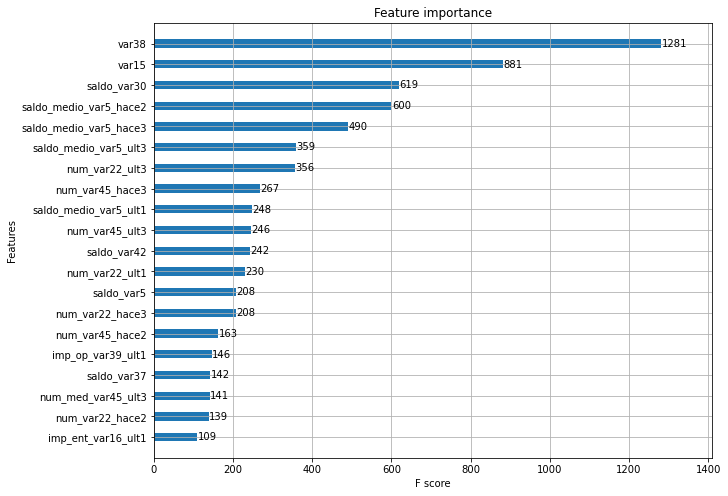

In [30]:
# 각 피처의 중요도를 피처 중요도 그래프로 나타내자.
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1,1,figsize=(10,8))
plot_importance(xgb_clf, ax=ax , max_num_features=20,height=0.4)

### LightGBM 모델 학습과 하이퍼 파라미터 튜닝

In [32]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=500)

evals = [(X_test, y_test)]
lgbm_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='auc', eval_set=evals, verbose=True)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1], average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

[1]	valid_0's auc: 0.817384	valid_0's binary_logloss: 0.165046
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.818903	valid_0's binary_logloss: 0.160006
[3]	valid_0's auc: 0.827707	valid_0's binary_logloss: 0.156323
[4]	valid_0's auc: 0.832155	valid_0's binary_logloss: 0.153463
[5]	valid_0's auc: 0.834677	valid_0's binary_logloss: 0.151256
[6]	valid_0's auc: 0.834093	valid_0's binary_logloss: 0.149427
[7]	valid_0's auc: 0.837046	valid_0's binary_logloss: 0.147961
[8]	valid_0's auc: 0.837838	valid_0's binary_logloss: 0.146591
[9]	valid_0's auc: 0.839435	valid_0's binary_logloss: 0.145455
[10]	valid_0's auc: 0.83973	valid_0's binary_logloss: 0.144486
[11]	valid_0's auc: 0.839799	valid_0's binary_logloss: 0.143769
[12]	valid_0's auc: 0.840034	valid_0's binary_logloss: 0.143146
[13]	valid_0's auc: 0.840271	valid_0's binary_logloss: 0.142533
[14]	valid_0's auc: 0.840342	valid_0's binary_logloss: 0.142036
[15]	valid_0's auc: 0.840928	valid_0's binary_loglos

#### 하이퍼 파라미터 튜닝을 해보자

In [33]:
from sklearn.model_selection import GridSearchCV

lgbm_clf = LGBMClassifier(n_estimators=200)

params = {'num_leaves': [32, 64 ],
          'max_depth':[128, 160],
          'min_child_samples':[60, 100],
          'subsample':[0.8, 1]}

gridcv = GridSearchCV(lgbm_clf, param_grid = params, cv=3)
gridcv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric='auc',eval_set=[(X_test,y_test)])

print('GridSearchCV 최적 파라미터:', gridcv.best_params_)
lgbm_roc_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:,1], average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

[1]	valid_0's auc: 0.81613	valid_0's binary_logloss: 0.164992
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.821835	valid_0's binary_logloss: 0.159874
[3]	valid_0's auc: 0.826533	valid_0's binary_logloss: 0.156346
[4]	valid_0's auc: 0.833166	valid_0's binary_logloss: 0.1534
[5]	valid_0's auc: 0.836448	valid_0's binary_logloss: 0.151167
[6]	valid_0's auc: 0.837094	valid_0's binary_logloss: 0.149356
[7]	valid_0's auc: 0.837965	valid_0's binary_logloss: 0.147853
[8]	valid_0's auc: 0.837663	valid_0's binary_logloss: 0.146543
[9]	valid_0's auc: 0.837413	valid_0's binary_logloss: 0.145528
[10]	valid_0's auc: 0.836954	valid_0's binary_logloss: 0.14466
[11]	valid_0's auc: 0.837393	valid_0's binary_logloss: 0.143843
[12]	valid_0's auc: 0.837459	valid_0's binary_logloss: 0.143285
[13]	valid_0's auc: 0.837612	valid_0's binary_logloss: 0.142732
[14]	valid_0's auc: 0.837055	valid_0's binary_logloss: 0.142403
[15]	valid_0's auc: 0.837198	valid_0's binary_logloss: 0

[1]	valid_0's auc: 0.81613	valid_0's binary_logloss: 0.164992
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.821835	valid_0's binary_logloss: 0.159874
[3]	valid_0's auc: 0.826533	valid_0's binary_logloss: 0.156346
[4]	valid_0's auc: 0.833166	valid_0's binary_logloss: 0.1534
[5]	valid_0's auc: 0.836448	valid_0's binary_logloss: 0.151167
[6]	valid_0's auc: 0.837094	valid_0's binary_logloss: 0.149356
[7]	valid_0's auc: 0.837965	valid_0's binary_logloss: 0.147853
[8]	valid_0's auc: 0.837663	valid_0's binary_logloss: 0.146543
[9]	valid_0's auc: 0.837413	valid_0's binary_logloss: 0.145528
[10]	valid_0's auc: 0.836954	valid_0's binary_logloss: 0.14466
[11]	valid_0's auc: 0.837393	valid_0's binary_logloss: 0.143843
[12]	valid_0's auc: 0.837459	valid_0's binary_logloss: 0.143285
[13]	valid_0's auc: 0.837612	valid_0's binary_logloss: 0.142732
[14]	valid_0's auc: 0.837055	valid_0's binary_logloss: 0.142403
[15]	valid_0's auc: 0.837198	valid_0's binary_logloss: 0

[1]	valid_0's auc: 0.818851	valid_0's binary_logloss: 0.164826
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.827144	valid_0's binary_logloss: 0.159879
[3]	valid_0's auc: 0.826851	valid_0's binary_logloss: 0.15631
[4]	valid_0's auc: 0.83073	valid_0's binary_logloss: 0.1534
[5]	valid_0's auc: 0.832753	valid_0's binary_logloss: 0.151136
[6]	valid_0's auc: 0.835605	valid_0's binary_logloss: 0.14924
[7]	valid_0's auc: 0.835612	valid_0's binary_logloss: 0.147799
[8]	valid_0's auc: 0.834408	valid_0's binary_logloss: 0.146634
[9]	valid_0's auc: 0.835623	valid_0's binary_logloss: 0.145549
[10]	valid_0's auc: 0.83487	valid_0's binary_logloss: 0.144745
[11]	valid_0's auc: 0.834692	valid_0's binary_logloss: 0.14411
[12]	valid_0's auc: 0.834746	valid_0's binary_logloss: 0.143527
[13]	valid_0's auc: 0.833582	valid_0's binary_logloss: 0.143122
[14]	valid_0's auc: 0.833205	valid_0's binary_logloss: 0.142745
[15]	valid_0's auc: 0.83246	valid_0's binary_logloss: 0.142

[46]	valid_0's auc: 0.83495	valid_0's binary_logloss: 0.140754
[47]	valid_0's auc: 0.835639	valid_0's binary_logloss: 0.14064
[48]	valid_0's auc: 0.835495	valid_0's binary_logloss: 0.140691
[49]	valid_0's auc: 0.835281	valid_0's binary_logloss: 0.140819
[50]	valid_0's auc: 0.835359	valid_0's binary_logloss: 0.140811
[51]	valid_0's auc: 0.835245	valid_0's binary_logloss: 0.140873
[52]	valid_0's auc: 0.835057	valid_0's binary_logloss: 0.140993
[53]	valid_0's auc: 0.834751	valid_0's binary_logloss: 0.14108
[54]	valid_0's auc: 0.83411	valid_0's binary_logloss: 0.141282
[55]	valid_0's auc: 0.833739	valid_0's binary_logloss: 0.141413
Early stopping, best iteration is:
[25]	valid_0's auc: 0.836722	valid_0's binary_logloss: 0.140403
[1]	valid_0's auc: 0.818851	valid_0's binary_logloss: 0.164826
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.827144	valid_0's binary_logloss: 0.159879
[3]	valid_0's auc: 0.826851	valid_0's binary_logloss: 0.15631
[4]	valid_0's au

[43]	valid_0's auc: 0.835035	valid_0's binary_logloss: 0.140691
[44]	valid_0's auc: 0.835214	valid_0's binary_logloss: 0.140703
[45]	valid_0's auc: 0.835276	valid_0's binary_logloss: 0.140695
[46]	valid_0's auc: 0.83495	valid_0's binary_logloss: 0.140754
[47]	valid_0's auc: 0.835639	valid_0's binary_logloss: 0.14064
[48]	valid_0's auc: 0.835495	valid_0's binary_logloss: 0.140691
[49]	valid_0's auc: 0.835281	valid_0's binary_logloss: 0.140819
[50]	valid_0's auc: 0.835359	valid_0's binary_logloss: 0.140811
[51]	valid_0's auc: 0.835245	valid_0's binary_logloss: 0.140873
[52]	valid_0's auc: 0.835057	valid_0's binary_logloss: 0.140993
[53]	valid_0's auc: 0.834751	valid_0's binary_logloss: 0.14108
[54]	valid_0's auc: 0.83411	valid_0's binary_logloss: 0.141282
[55]	valid_0's auc: 0.833739	valid_0's binary_logloss: 0.141413
Early stopping, best iteration is:
[25]	valid_0's auc: 0.836722	valid_0's binary_logloss: 0.140403
[1]	valid_0's auc: 0.817791	valid_0's binary_logloss: 0.165072
Training u

[32]	valid_0's auc: 0.838675	valid_0's binary_logloss: 0.139761
[33]	valid_0's auc: 0.838893	valid_0's binary_logloss: 0.139687
[34]	valid_0's auc: 0.838801	valid_0's binary_logloss: 0.139672
[35]	valid_0's auc: 0.838835	valid_0's binary_logloss: 0.139667
[36]	valid_0's auc: 0.838505	valid_0's binary_logloss: 0.139699
[37]	valid_0's auc: 0.838104	valid_0's binary_logloss: 0.139783
[38]	valid_0's auc: 0.838267	valid_0's binary_logloss: 0.139787
[39]	valid_0's auc: 0.838004	valid_0's binary_logloss: 0.139806
[40]	valid_0's auc: 0.838086	valid_0's binary_logloss: 0.139745
[41]	valid_0's auc: 0.838538	valid_0's binary_logloss: 0.139694
[42]	valid_0's auc: 0.838647	valid_0's binary_logloss: 0.139655
[43]	valid_0's auc: 0.838495	valid_0's binary_logloss: 0.139653
[44]	valid_0's auc: 0.838221	valid_0's binary_logloss: 0.139755
[45]	valid_0's auc: 0.837981	valid_0's binary_logloss: 0.139769
[46]	valid_0's auc: 0.838471	valid_0's binary_logloss: 0.139693
[47]	valid_0's auc: 0.83861	valid_0's bi

[28]	valid_0's auc: 0.837623	valid_0's binary_logloss: 0.140007
[29]	valid_0's auc: 0.838216	valid_0's binary_logloss: 0.13986
[30]	valid_0's auc: 0.838898	valid_0's binary_logloss: 0.139742
[31]	valid_0's auc: 0.838959	valid_0's binary_logloss: 0.139727
[32]	valid_0's auc: 0.838675	valid_0's binary_logloss: 0.139761
[33]	valid_0's auc: 0.838893	valid_0's binary_logloss: 0.139687
[34]	valid_0's auc: 0.838801	valid_0's binary_logloss: 0.139672
[35]	valid_0's auc: 0.838835	valid_0's binary_logloss: 0.139667
[36]	valid_0's auc: 0.838505	valid_0's binary_logloss: 0.139699
[37]	valid_0's auc: 0.838104	valid_0's binary_logloss: 0.139783
[38]	valid_0's auc: 0.838267	valid_0's binary_logloss: 0.139787
[39]	valid_0's auc: 0.838004	valid_0's binary_logloss: 0.139806
[40]	valid_0's auc: 0.838086	valid_0's binary_logloss: 0.139745
[41]	valid_0's auc: 0.838538	valid_0's binary_logloss: 0.139694
[42]	valid_0's auc: 0.838647	valid_0's binary_logloss: 0.139655
[43]	valid_0's auc: 0.838495	valid_0's bi

[22]	valid_0's auc: 0.837366	valid_0's binary_logloss: 0.140547
[23]	valid_0's auc: 0.837357	valid_0's binary_logloss: 0.140445
[24]	valid_0's auc: 0.837343	valid_0's binary_logloss: 0.140371
[25]	valid_0's auc: 0.83723	valid_0's binary_logloss: 0.140313
[26]	valid_0's auc: 0.837761	valid_0's binary_logloss: 0.140173
[27]	valid_0's auc: 0.838046	valid_0's binary_logloss: 0.140086
[28]	valid_0's auc: 0.838029	valid_0's binary_logloss: 0.140051
[29]	valid_0's auc: 0.837775	valid_0's binary_logloss: 0.140057
[30]	valid_0's auc: 0.837472	valid_0's binary_logloss: 0.140111
[31]	valid_0's auc: 0.837575	valid_0's binary_logloss: 0.140093
[32]	valid_0's auc: 0.837158	valid_0's binary_logloss: 0.140195
[33]	valid_0's auc: 0.837296	valid_0's binary_logloss: 0.140221
[34]	valid_0's auc: 0.837481	valid_0's binary_logloss: 0.140165
[35]	valid_0's auc: 0.837953	valid_0's binary_logloss: 0.140085
[36]	valid_0's auc: 0.837794	valid_0's binary_logloss: 0.140112
[37]	valid_0's auc: 0.837291	valid_0's bi

[22]	valid_0's auc: 0.837366	valid_0's binary_logloss: 0.140547
[23]	valid_0's auc: 0.837357	valid_0's binary_logloss: 0.140445
[24]	valid_0's auc: 0.837343	valid_0's binary_logloss: 0.140371
[25]	valid_0's auc: 0.83723	valid_0's binary_logloss: 0.140313
[26]	valid_0's auc: 0.837761	valid_0's binary_logloss: 0.140173
[27]	valid_0's auc: 0.838046	valid_0's binary_logloss: 0.140086
[28]	valid_0's auc: 0.838029	valid_0's binary_logloss: 0.140051
[29]	valid_0's auc: 0.837775	valid_0's binary_logloss: 0.140057
[30]	valid_0's auc: 0.837472	valid_0's binary_logloss: 0.140111
[31]	valid_0's auc: 0.837575	valid_0's binary_logloss: 0.140093
[32]	valid_0's auc: 0.837158	valid_0's binary_logloss: 0.140195
[33]	valid_0's auc: 0.837296	valid_0's binary_logloss: 0.140221
[34]	valid_0's auc: 0.837481	valid_0's binary_logloss: 0.140165
[35]	valid_0's auc: 0.837953	valid_0's binary_logloss: 0.140085
[36]	valid_0's auc: 0.837794	valid_0's binary_logloss: 0.140112
[37]	valid_0's auc: 0.837291	valid_0's bi

[33]	valid_0's auc: 0.839549	valid_0's binary_logloss: 0.139075
[34]	valid_0's auc: 0.839087	valid_0's binary_logloss: 0.139148
[35]	valid_0's auc: 0.8389	valid_0's binary_logloss: 0.139187
[36]	valid_0's auc: 0.838921	valid_0's binary_logloss: 0.139194
[37]	valid_0's auc: 0.839133	valid_0's binary_logloss: 0.139161
[38]	valid_0's auc: 0.838975	valid_0's binary_logloss: 0.139143
[39]	valid_0's auc: 0.839037	valid_0's binary_logloss: 0.139138
[40]	valid_0's auc: 0.839204	valid_0's binary_logloss: 0.139119
[41]	valid_0's auc: 0.839277	valid_0's binary_logloss: 0.139091
[42]	valid_0's auc: 0.838964	valid_0's binary_logloss: 0.139133
[43]	valid_0's auc: 0.839024	valid_0's binary_logloss: 0.139124
[44]	valid_0's auc: 0.838652	valid_0's binary_logloss: 0.139203
[45]	valid_0's auc: 0.839016	valid_0's binary_logloss: 0.139124
[46]	valid_0's auc: 0.838683	valid_0's binary_logloss: 0.139184
[47]	valid_0's auc: 0.838624	valid_0's binary_logloss: 0.139193
[48]	valid_0's auc: 0.838569	valid_0's bin

[32]	valid_0's auc: 0.839268	valid_0's binary_logloss: 0.13919
[33]	valid_0's auc: 0.839549	valid_0's binary_logloss: 0.139075
[34]	valid_0's auc: 0.839087	valid_0's binary_logloss: 0.139148
[35]	valid_0's auc: 0.8389	valid_0's binary_logloss: 0.139187
[36]	valid_0's auc: 0.838921	valid_0's binary_logloss: 0.139194
[37]	valid_0's auc: 0.839133	valid_0's binary_logloss: 0.139161
[38]	valid_0's auc: 0.838975	valid_0's binary_logloss: 0.139143
[39]	valid_0's auc: 0.839037	valid_0's binary_logloss: 0.139138
[40]	valid_0's auc: 0.839204	valid_0's binary_logloss: 0.139119
[41]	valid_0's auc: 0.839277	valid_0's binary_logloss: 0.139091
[42]	valid_0's auc: 0.838964	valid_0's binary_logloss: 0.139133
[43]	valid_0's auc: 0.839024	valid_0's binary_logloss: 0.139124
[44]	valid_0's auc: 0.838652	valid_0's binary_logloss: 0.139203
[45]	valid_0's auc: 0.839016	valid_0's binary_logloss: 0.139124
[46]	valid_0's auc: 0.838683	valid_0's binary_logloss: 0.139184
[47]	valid_0's auc: 0.838624	valid_0's bina

[21]	valid_0's auc: 0.835822	valid_0's binary_logloss: 0.140843
[22]	valid_0's auc: 0.835849	valid_0's binary_logloss: 0.140761
[23]	valid_0's auc: 0.836223	valid_0's binary_logloss: 0.140607
[24]	valid_0's auc: 0.836473	valid_0's binary_logloss: 0.14049
[25]	valid_0's auc: 0.836722	valid_0's binary_logloss: 0.140403
[26]	valid_0's auc: 0.836549	valid_0's binary_logloss: 0.140423
[27]	valid_0's auc: 0.836155	valid_0's binary_logloss: 0.140447
[28]	valid_0's auc: 0.835594	valid_0's binary_logloss: 0.140532
[29]	valid_0's auc: 0.835464	valid_0's binary_logloss: 0.140508
[30]	valid_0's auc: 0.83577	valid_0's binary_logloss: 0.140461
[31]	valid_0's auc: 0.835475	valid_0's binary_logloss: 0.140463
[32]	valid_0's auc: 0.835364	valid_0's binary_logloss: 0.140506
[33]	valid_0's auc: 0.835865	valid_0's binary_logloss: 0.14041
[34]	valid_0's auc: 0.836021	valid_0's binary_logloss: 0.140353
[35]	valid_0's auc: 0.8359	valid_0's binary_logloss: 0.140396
[36]	valid_0's auc: 0.835855	valid_0's binary

[25]	valid_0's auc: 0.836722	valid_0's binary_logloss: 0.140403
[26]	valid_0's auc: 0.836549	valid_0's binary_logloss: 0.140423
[27]	valid_0's auc: 0.836155	valid_0's binary_logloss: 0.140447
[28]	valid_0's auc: 0.835594	valid_0's binary_logloss: 0.140532
[29]	valid_0's auc: 0.835464	valid_0's binary_logloss: 0.140508
[30]	valid_0's auc: 0.83577	valid_0's binary_logloss: 0.140461
[31]	valid_0's auc: 0.835475	valid_0's binary_logloss: 0.140463
[32]	valid_0's auc: 0.835364	valid_0's binary_logloss: 0.140506
[33]	valid_0's auc: 0.835865	valid_0's binary_logloss: 0.14041
[34]	valid_0's auc: 0.836021	valid_0's binary_logloss: 0.140353
[35]	valid_0's auc: 0.8359	valid_0's binary_logloss: 0.140396
[36]	valid_0's auc: 0.835855	valid_0's binary_logloss: 0.140416
[37]	valid_0's auc: 0.836185	valid_0's binary_logloss: 0.140369
[38]	valid_0's auc: 0.835754	valid_0's binary_logloss: 0.140443
[39]	valid_0's auc: 0.835638	valid_0's binary_logloss: 0.140474
[40]	valid_0's auc: 0.835639	valid_0's binar

[31]	valid_0's auc: 0.838959	valid_0's binary_logloss: 0.139727
[32]	valid_0's auc: 0.838675	valid_0's binary_logloss: 0.139761
[33]	valid_0's auc: 0.838893	valid_0's binary_logloss: 0.139687
[34]	valid_0's auc: 0.838801	valid_0's binary_logloss: 0.139672
[35]	valid_0's auc: 0.838835	valid_0's binary_logloss: 0.139667
[36]	valid_0's auc: 0.838505	valid_0's binary_logloss: 0.139699
[37]	valid_0's auc: 0.838104	valid_0's binary_logloss: 0.139783
[38]	valid_0's auc: 0.838267	valid_0's binary_logloss: 0.139787
[39]	valid_0's auc: 0.838004	valid_0's binary_logloss: 0.139806
[40]	valid_0's auc: 0.838086	valid_0's binary_logloss: 0.139745
[41]	valid_0's auc: 0.838538	valid_0's binary_logloss: 0.139694
[42]	valid_0's auc: 0.838647	valid_0's binary_logloss: 0.139655
[43]	valid_0's auc: 0.838495	valid_0's binary_logloss: 0.139653
[44]	valid_0's auc: 0.838221	valid_0's binary_logloss: 0.139755
[45]	valid_0's auc: 0.837981	valid_0's binary_logloss: 0.139769
[46]	valid_0's auc: 0.838471	valid_0's b

[23]	valid_0's auc: 0.837884	valid_0's binary_logloss: 0.140328
[24]	valid_0's auc: 0.838481	valid_0's binary_logloss: 0.140215
[25]	valid_0's auc: 0.838239	valid_0's binary_logloss: 0.140124
[26]	valid_0's auc: 0.837903	valid_0's binary_logloss: 0.140092
[27]	valid_0's auc: 0.837493	valid_0's binary_logloss: 0.14006
[28]	valid_0's auc: 0.837623	valid_0's binary_logloss: 0.140007
[29]	valid_0's auc: 0.838216	valid_0's binary_logloss: 0.13986
[30]	valid_0's auc: 0.838898	valid_0's binary_logloss: 0.139742
[31]	valid_0's auc: 0.838959	valid_0's binary_logloss: 0.139727
[32]	valid_0's auc: 0.838675	valid_0's binary_logloss: 0.139761
[33]	valid_0's auc: 0.838893	valid_0's binary_logloss: 0.139687
[34]	valid_0's auc: 0.838801	valid_0's binary_logloss: 0.139672
[35]	valid_0's auc: 0.838835	valid_0's binary_logloss: 0.139667
[36]	valid_0's auc: 0.838505	valid_0's binary_logloss: 0.139699
[37]	valid_0's auc: 0.838104	valid_0's binary_logloss: 0.139783
[38]	valid_0's auc: 0.838267	valid_0's bin

[1]	valid_0's auc: 0.822983	valid_0's binary_logloss: 0.165104
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.830472	valid_0's binary_logloss: 0.159671
[3]	valid_0's auc: 0.830873	valid_0's binary_logloss: 0.155985
[4]	valid_0's auc: 0.830975	valid_0's binary_logloss: 0.15321
[5]	valid_0's auc: 0.832135	valid_0's binary_logloss: 0.150854
[6]	valid_0's auc: 0.833116	valid_0's binary_logloss: 0.149013
[7]	valid_0's auc: 0.833811	valid_0's binary_logloss: 0.147577
[8]	valid_0's auc: 0.835315	valid_0's binary_logloss: 0.146273
[9]	valid_0's auc: 0.835042	valid_0's binary_logloss: 0.145374
[10]	valid_0's auc: 0.834154	valid_0's binary_logloss: 0.144649
[11]	valid_0's auc: 0.834587	valid_0's binary_logloss: 0.143941
[12]	valid_0's auc: 0.834242	valid_0's binary_logloss: 0.143366
[13]	valid_0's auc: 0.833273	valid_0's binary_logloss: 0.142976
[14]	valid_0's auc: 0.833783	valid_0's binary_logloss: 0.142567
[15]	valid_0's auc: 0.834057	valid_0's binary_logloss

[35]	valid_0's auc: 0.8361	valid_0's binary_logloss: 0.139574
[36]	valid_0's auc: 0.836147	valid_0's binary_logloss: 0.139608
[37]	valid_0's auc: 0.836601	valid_0's binary_logloss: 0.139569
[38]	valid_0's auc: 0.836232	valid_0's binary_logloss: 0.139645
[39]	valid_0's auc: 0.836415	valid_0's binary_logloss: 0.139653
[40]	valid_0's auc: 0.836463	valid_0's binary_logloss: 0.139671
[41]	valid_0's auc: 0.836223	valid_0's binary_logloss: 0.139762
[42]	valid_0's auc: 0.836151	valid_0's binary_logloss: 0.139777
[43]	valid_0's auc: 0.836216	valid_0's binary_logloss: 0.139761
[44]	valid_0's auc: 0.836328	valid_0's binary_logloss: 0.139755
Early stopping, best iteration is:
[14]	valid_0's auc: 0.838226	valid_0's binary_logloss: 0.141392
[1]	valid_0's auc: 0.822983	valid_0's binary_logloss: 0.165104
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.830472	valid_0's binary_logloss: 0.159671
[3]	valid_0's auc: 0.830873	valid_0's binary_logloss: 0.155985
[4]	valid_0's

In [34]:
# 최적 파라미터를 기반으로 다른 하이퍼 파라미터를 변경 또는 추가
lgbm_clf = LGBMClassifier(n_estimators=1000, max_depth= 128, min_child_samples= 100, num_leaves= 32, subsample= 0.8)

evals= [(X_test, y_test)]
lgbm_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='auc', eval_set=evals, verbose=True)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1], average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

[1]	valid_0's auc: 0.819488	valid_0's binary_logloss: 0.165016
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.822075	valid_0's binary_logloss: 0.159734
[3]	valid_0's auc: 0.829436	valid_0's binary_logloss: 0.156119
[4]	valid_0's auc: 0.836147	valid_0's binary_logloss: 0.153073
[5]	valid_0's auc: 0.839041	valid_0's binary_logloss: 0.150773
[6]	valid_0's auc: 0.839076	valid_0's binary_logloss: 0.148948
[7]	valid_0's auc: 0.839943	valid_0's binary_logloss: 0.147346
[8]	valid_0's auc: 0.84098	valid_0's binary_logloss: 0.146068
[9]	valid_0's auc: 0.840686	valid_0's binary_logloss: 0.14506
[10]	valid_0's auc: 0.841299	valid_0's binary_logloss: 0.144134
[11]	valid_0's auc: 0.841659	valid_0's binary_logloss: 0.14327
[12]	valid_0's auc: 0.841543	valid_0's binary_logloss: 0.14261
[13]	valid_0's auc: 0.841645	valid_0's binary_logloss: 0.14205
[14]	valid_0's auc: 0.841389	valid_0's binary_logloss: 0.14164
[15]	valid_0's auc: 0.84154	valid_0's binary_logloss: 0.1